In [ ]:
#fraudulent credit card transactions
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

file_path = "/content/spam_sms.csv"
df = pd.read_csv(file_path, encoding='latin-1')

df.columns = ["label", "message"]

df["label"] = df["label"].map({"ham": 0, "spam": 1})
X_train, X_test, y_train, y_test = train_test_split(df["message"], df["label"], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel="linear")
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.9731
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Logistic Regression Accuracy: 0.9552
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.69      0.80       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

SVM Accuracy: 0.9794
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.

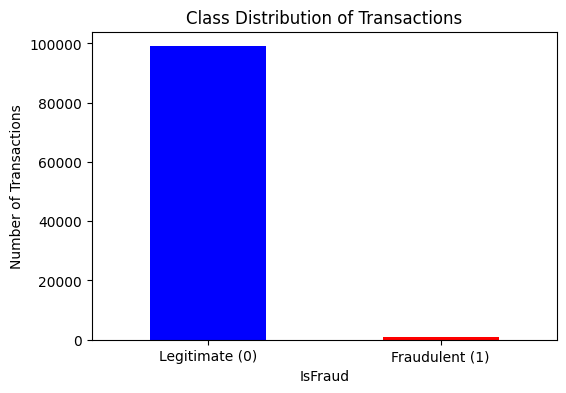

Model Performance (F1-score for fraud detection):
{'Logistic Regression': 0.01567209162145871, 'Decision Tree': 0.02077922077922078, 'Random Forest': 0.0}


In [2]:
#SMS Spam or not
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

file_path = "/content/credit_card_fraud_dataset.csv"
df = pd.read_csv(file_path)

df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

label_encoders = {}
for col in ["TransactionType", "Location"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.drop(columns=["TransactionID", "TransactionDate"], inplace=True)

X = df.drop(columns=["IsFraud"])
y = df["IsFraud"]

fraud_counts = y.value_counts()
plt.figure(figsize=(6, 4))
fraud_counts.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Legitimate (0)", "Fraudulent (1)"], rotation=0)
plt.ylabel("Number of Transactions")
plt.title("Class Distribution of Transactions")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(class_weight="balanced", random_state=42)
dec_tree = DecisionTreeClassifier(class_weight="balanced", random_state=42)
rand_forest = RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=100)

log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)

log_reg_pred = log_reg.predict(X_test)
dec_tree_pred = dec_tree.predict(X_test)
rand_forest_pred = rand_forest.predict(X_test)

log_reg_report = classification_report(y_test, log_reg_pred, output_dict=True)
dec_tree_report = classification_report(y_test, dec_tree_pred, output_dict=True)
rand_forest_report = classification_report(y_test, rand_forest_pred, output_dict=True)

model_performance = {
    "Logistic Regression": log_reg_report["1"]["f1-score"],
    "Decision Tree": dec_tree_report["1"]["f1-score"],
    "Random Forest": rand_forest_report["1"]["f1-score"],
}

print("Model Performance (F1-score for fraud detection):")
print(model_performance)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')